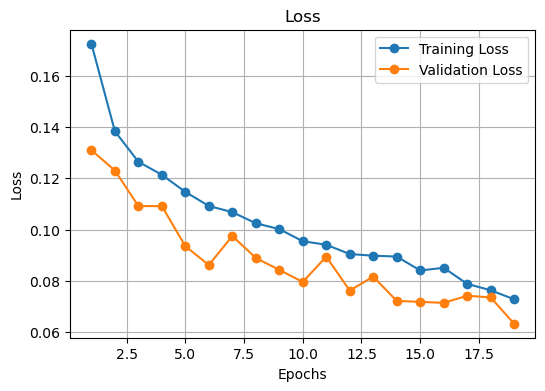

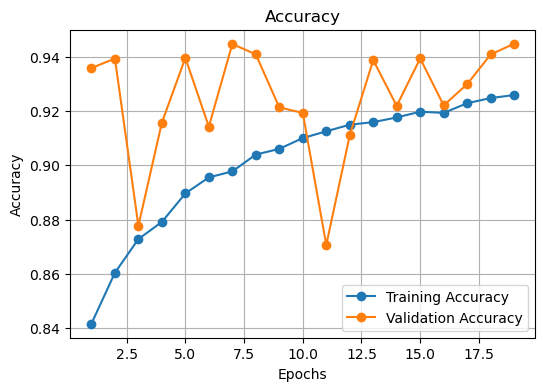

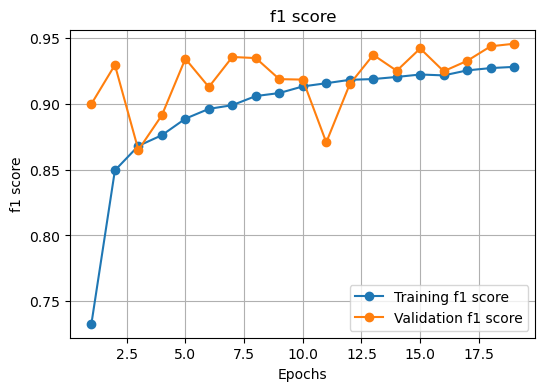

In [1]:
import matplotlib.pyplot as plt
import ast

# Initialize lists
epochs = []
loss = []
val_loss = []
accuracy = []
val_accuracy = []
f1_score = []
val_f1_score = []

# Read the file
with open("../models/unet_v11_training_log.txt", "r") as file:
    for line in file:
        # Split into epoch number and dictionary
        parts = line.split(": ", 1)
        epoch = int(parts[0].split()[1])  # Extract epoch number
        metrics = ast.literal_eval(parts[1])  # Convert string to dictionary
        
        # Append values
        epochs.append(epoch)
        loss.append(metrics['loss'])
        val_loss.append(metrics['val_loss'])
        accuracy.append(metrics['accuracy'])
        val_accuracy.append(metrics['val_accuracy'])
        f1_score.append(metrics['f1_score'])
        val_f1_score.append(metrics['val_f1_score'])

# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot f1 Score
plt.figure(figsize=(6,4))
plt.plot(epochs, f1_score, label='Training f1 score', marker='o')
plt.plot(epochs, val_f1_score, label='Validation f1 score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('f1 score')

plt.title('f1 score')
plt.legend()
plt.grid()
plt.show()

In [2]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Read raw log data
with open('../models/unet_v9_multiclass_epoch_10_training_log.txt', 'r') as file:
    lines = file.readlines()

# Dictionary to store lists of metrics per epoch
metrics = defaultdict(lambda: defaultdict(list))

# Parse each line
for line in lines:
    match = re.match(r"Epoch (\d+): (.*)", line)
    if match:
        epoch = int(match.group(1))
        metric_str = match.group(2)
        metric_dict = eval(metric_str)  # Use only with trusted input!
        for key, value in metric_dict.items():
            metrics[key][epoch].append(value)

# Average values if repeated entries for the same epoch
averaged_metrics = {
    key: {
        epoch: sum(values) / len(values)
        for epoch, values in epoch_dict.items()
    }
    for key, epoch_dict in metrics.items()
}

# Plotting helper
def plot_two_metrics(metric1, metric2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    for metric, label in zip([metric1, metric2], [label1, label2]):
        if metric in averaged_metrics:
            epochs = sorted(averaged_metrics[metric].keys())
            values = [averaged_metrics[metric][ep] for ep in epochs]
            plt.plot(epochs, values, label=label)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot 1: Accuracy
plot_two_metrics("accuracy", "val_accuracy", "Training Accuracy", "Validation Accuracy", "Accuracy over Epochs")

# Plot 2: F1 Score
plot_two_metrics("f1_score", "val_f1_score", "Training F1 Score", "Validation F1 Score", "F1 Score over Epochs")

# Plot 3: Loss
plot_two_metrics("loss", "val_loss", "Training Loss", "Validation Loss", "Loss over Epochs")


FileNotFoundError: [Errno 2] No such file or directory: '../models/unet_v9_multiclass_epoch_10_training_log.txt'

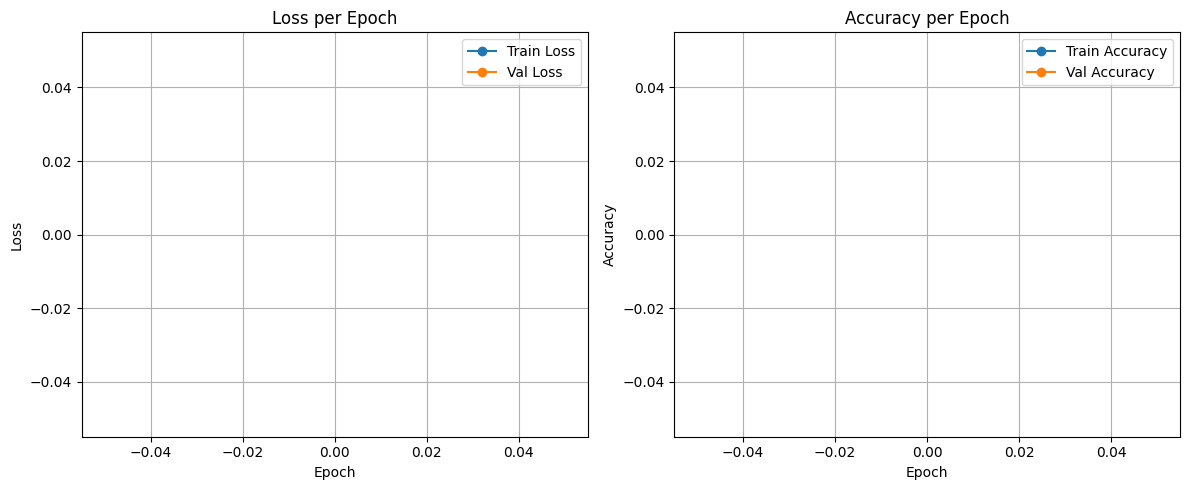

In [ ]:
import re
import matplotlib.pyplot as plt

# Read log file
log_file = "training_log.txt"
with open(log_file, "r") as f:
    lines = f.readlines()

# Initialize storage
epochs = []
losses = []
val_losses = []
accuracies = []
val_accuracies = []

for i, line in enumerate(lines):
    # Look for epoch line
    epoch_match = re.match(r"Epoch (\d+):", line)
    if epoch_match:
        epoch = int(epoch_match.group(1))

        # Scan next few lines to find training summary
        for j in range(i+1, min(i+5, len(lines))):
            match = re.search(r"loss: ([0-9.]+).*?Accuracy: ([0-9.]+).*?val_loss: ([0-9.]+).*?val_Accuracy: ([0-9.]+)", lines[j])
            if match:
                loss, acc, val_loss, val_acc = map(float, match.groups())
                epochs.append(epoch)
                losses.append(loss)
                accuracies.append(acc)
                val_losses.append(val_loss)
                val_accuracies.append(val_acc)
                break  # Found metrics for this epoch

# Plot
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Val Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
loss

[]